# Algorithm Theoretical Basis Document: Algorithms to Validate NISAR L2 Coseismic, Transient and Secular Displacement Requirements

*Revision 14*

*January 31, 2021*

*NISAR Solid Earth Team*

<hr/>

## 1.Transient Deformation
Detecting and quantifying transient deformation is essential for improving our understanding of fundamental processes associated with tectonics, subsurface movement of magma, volcanic eruptions, landslides, response to changing surface loads and a wide variety of anthropogenic phenomena.

## 2.1 Requirements
**L2 Requirement 663 – Deformation Transients:** *The NISAR project shall measure at least two components of the point-to-point vector displacements over at least 70% of targeted sites with accuracy of $3(1+ L^{1/2})$ mm or better, over length scales 0.1 km < L < 50 km, at 100 m resolution, and over 12-day time scales.*

NISAR must be able to constrain displacements in two look directions (left-looking on both ascending and descending tracks) for the active area of 70% of target sites with an accuracy that scales with baseline distance L between any two locations within a scene. This pertains to all directly measured or inferred 12-day interferograms over the duration of the mission. Here, accuracy is calculated using L in kilometers but with the units removed, at or better than 100 m resolution. The 12-day time scale corresponds to a repeat NISAR pass on each of the ascending and descending satellite tracks, from which interferograms can be made and displacements estimated. The NISAR mission has compiled a list of 2000 global targets covering areas of known or potential transient deformation related to the processes specified in the requirement (NISAR Handbook Appendix H, 2018). These targets include all Earth's active volcanoes above sea-level, areas of rapid glacial mass changes, selected deforming reservoirs of water, oil, gas, CO2 and steam and landslide-prone areas near major population centers, as well as sites where selected disaster-related events have occurred. 

## 2.2 Approach to validating the L2 requirements
We use [two] approaches [in this notebook] for validating the NISAR solid earth L2 requirements. [Both] approaches require the generation of a standard set of NISAR L3 data products consisting of surface displacement for selected areas that sample a range of vegetation types, topographic relief, and strain rates. Generation of these products, as discussed in Section 3, requires a set of temporally contiguous/overlapping SAR interferograms over all time periods of interest (see description of inputs and potential preprocessing steps in Sections 3 and 5).

All the Solid Earth Science requirements specify a minimum spatial coverage component, whose validation will rely on a combination of assessing the coverage of InSAR-quality data and ensuring that the required measurement accuracy is achieved in a suite of locations that comprehensively sample different types of regions with respect to surface properties and vegetation land cover. Many of these regions will be automatically evaluated as part of the targeted sites for the transient deformation requirement.

### 2.2.1	L2 Requirement 663 - Transient Displacements

To validate the L2 requirements on transient displacements, we will produce 12-day interferograms from both descending and ascending tracks over diverse target sites where GNSS observations are available. The two components of vector displacement, ascending and descending, will be validated separately.

For **Validation Approach 1**, we will use unwrapped interferograms at 100-m resolution to produce point-to-point relative LOS measurements (and their associated uncertainties) between GNSS sites. Position observations from the same set of GNSS sites and at the InSAR acquisition times will be projected into the LOS direction and differenced pairwise. These will be compared to the point-to-point InSAR LOS measurements using a methodology similar to that described in Section 2.2.2., except that the accuracy specification is $3(1+L^{1/2})$ mm over 0.1 km < L < 50 km. 

For **Validation Approach 2**, we will utilize interferograms over the non-deforming areas discussed in Section 2.2.1. In practice, characterization of transient deformation will usually be improved by examining longer time series of interferograms. The approach described here validates the requirement that short timescale or temporally complex transients can be characterized with a single interferogram. 

For **Validation Approach 3**, which can be blended with the first two approaches, we use UAVSAR to validate the InSAR-derived motions at scales smaller than the characteristic spacing between the GNSS stations. UAVSAR has the advantage of filling in the spatial sampling between GNSS stations at a resolution approximately 10X higher than the resolution of NISAR images. Ideally, UAVSAR data will be collected during NISAR passes. Corner reflectors will further validate the accuracy and can be used to assess UAVSAR motion compensation errors. Assessment of UAVSAR motion compensation errors should be carried out prior to NISAR launch from experiments using corner reflectors that are moved between passes.

Comprehensive validation requires transient sites possessing different deformation characteristics (e.g., volcanoes, landslides, aquifers, hydrocarbons, etc.), vegetation covers (forest, shrub, bare surface, etc.), seasonality (leaf on/off, snow, etc.), and terrain slopes. The NISAR Science Team will select a set of cal/val regions to be used for this requirement and will list those sites in the NISAR cal/val plan.

## 2.3.	Technical Framework for Validating Requirements
### 2.3.1.	Comparison of GNSS and InSAR measurements
The InSAR and GNSS comparisons for Requirement [663] will be performed based on the basis of interferogram by interferogram.

### 2.3.2.	Spatial Analysis of InSAR scenes
Individual interferogram analysis in non-deforming regions will be conducted based on unwrapped interferograms at the required spatial resolutions. We first estimate the covariances or semi-variogram of phase observations between points of varying distances by constructing the structure function (e.g., Lohman & Simons, 2005) (see Section 4.2). We then compare the spatial spectrum of the covariance function to the requirement(s) at distances between 0.1 and 50 km  to validate that the observed noise is smaller than the threshold in the various requirements. We use ensemble statistics over many interferograms and over different terrains and seasons for this validation approach. SES members have done relevant work in the past to validate the NISAR performance tool (Hensley et al., 2016) using the  70-km swath of ALOS interferograms. Before the NISAR launch, we can use ALOS-2 wide-swath or Sentinel-1 scenes to conduct this validation.

<hr/>

# Algorithm to Validate NISAR L2 Transient Displacement Requirement

**Original code authored by:** NISAR Science Team Members and Affiliates  

## 3.1 Interferogram Preparation
>A. Introduction  
 B. Configure Local Processing Environment  
 C. Download Interferograms  
 D. Set Up MintPy Configuration File   
 E. Load Data


## 3.2. Optional Interferograms Correction
>A. Solid Earth Tides Correction  
 B. Trospheric Delay Correction  
 C. Topographic Residual Correction  


## 4.1 Make GNSS LOS Measurements 
>A.  Find Collocated GNSS Stations   
 B.  Make GNSS LOS Displacements   
 C.  Make GNSS and InSAR Relative Displacements


## 4.2 NISAR Validation: GNSS-InSAR Direct Comparison
> A. Compare Relative Displacement  
  B. Plot Displacement Residuals Distribution  
  C. Plot Displacement Residuals with respect to Distance  


## 4.3 NISAR Validation: Noise Level validation
> A. Mask Pixels with Low Coherence   
  B. Remove Trend   
  C. Randomly Sample Pixel Pairs   
  D. Compute Emprical Variance   
  E. Make Binned Variogram   
  F. Compare Variation with Requirement

**Note:** Since the validation approach for Transient Requirement is different with respect to Secular Requirement, the document structure is different compared with ATBD.

# 3.1 Interferogram Preparation
In this initial processing step, all the necessary Level-2 unwrapped interferogram products are gathered. Ascending and descending interferograms will be prepared for independent analysis. 

### 3.1.A  Introduction
The project will provide sets of ascending and descending unwrapped L2 interferograms over regions of interest listed in the NISAR Solid Earth calval document. For the purpose of testing calval algorithms prior to NISAR launch, the NISAR SE team will make interferograms using SAR data from complementary missions (e.g. Sentinel-1 or ALOS-2). These will include at a minimum nearest-neighbor interferograms.

As part of L2 processing, the project will calculate and apply required and optional corrections to minimize errors due to non-geophysical sources. An example of a required correction is the removal of ionospheric propagation delays using split-band processing.

### 3.1.B  Configure Local Processing Environment

In [1]:
#Load Packages
import math
import numpy as np
import os
import pandas as pd
from datetime import datetime as dt
from matplotlib import pyplot as plt
from mintpy.utils import readfile, utils as ut
from mintpy.objects import gps
from mintpy.objects.gps import GPS
from scipy import special
from scipy.stats import binned_statistic
from pathlib import Path
import subprocess
import pyproj
from solid_utils import variogram

In [2]:
# check if we already have a calval directory here
dir_path = os.path.dirname(os.path.realpath('calval'))
print ('dir path', dir_path)

dir path /Users/fielding/Downloads/ATBD/Transient


In [3]:
#Set Custom Parameters
site='OK'  # choose 'OK' for Okahoma area with NISAR Corner Reflectors or 'CV' for Central Valley of California
season = 'winter'  # could be 'summer'

# top-level directory for calval work
if 'dir_path' in locals():
    topDir = dir_path
else:
    topDir = '/Users/fielding/Downloads/ATBD/Transient' # set my path
    
os.chdir(topDir)
#calval_dir = '/Users/fielding/Downloads/ATBD/Transient/calval'
calval_dir = Path.cwd()/'calval'  # assume it is below current working directory to avoid specific path

if site == 'CV':    # use Central Valley test site
    calval_location = 'central_valley'
    download_region = '"36.18 36.26 -119.91 -119.77"' #download box in S,N,W,E format
    analysis_region = '"35.77 36.75 -120.61 -118.06"' #analysis box in S,N,W,E format (must be within download_region)
    download_start_date = '20180101'
    download_end_date = '20180801'
    sentinel_track = '144'
    gps_ref_site_name = 'P467'  # reference site for this area


elif site == 'OK': # use Oklahoma site
    # WKT POLYGON((-103.3517 31.6698,-93.4754 31.6698,-93.4754 37.4283,-103.3517 37.4283,-103.3517 31.6698))    
    calval_location = 'Oklahoma'
    download_region = '"31.7 37.4 -103.3 -93.5"' #download box in S,N,W,E format
    analysis_region = '"35.25 36.5 -100.5 -98.5"' #analysis box in S,N,W,E format (must be within download_region)
    if season == 'winter':
        download_start_date = '20210101'
        download_end_date = '20210122'  # transient notebook presently only works with one interferogram '20210801'
    elif season == 'summer':
        download_start_date = '20210620'
        download_end_date = '20210710'  # transient notebook presently only works with one interferogram '20210801'
    else:
        print('season not set')
    sentinel_track = '107'
    gps_ref_site_name = 'TXCI'

#Set Directories
print("calval directory: ", str(calval_dir))
calval_dir.mkdir(exist_ok=True)
work_dir = calval_dir/calval_location
print("Work directory: ", str(work_dir))
work_dir.mkdir(exist_ok=True)

mint_dir = work_dir/'Mintpy'
mint_dir.mkdir(exist_ok=True)
gunw_dir = work_dir/'products'

calval directory:  /Users/fielding/Downloads/ATBD/Transient/calval
Work directory:  /Users/fielding/Downloads/ATBD/Transient/calval/Oklahoma


### 3.1.C  Download Interferogram

In [4]:
# download all interferograms that intersect download_region over specified time range
os.chdir(work_dir)
command = 'ariaDownload.py --bbox ' + download_region + ' --start ' + download_start_date + ' --end ' + download_end_date 
if sentinel_track != '':
    command = command + ' --track ' + sentinel_track

result = subprocess.run(command,capture_output=True,text=True,shell=True)
print(result.stdout)

#delete unnecessary files
(gunw_dir/"avg_rates.csv").unlink(missing_ok=True)
(gunw_dir/"ASFDataDload0.py").unlink(missing_ok=True)
(gunw_dir/"AvgDlSpeed.png").unlink(missing_ok=True)
(gunw_dir/"error.log").unlink(missing_ok=True)
(work_dir/"error.log").unlink(missing_ok=True)

ARIA-tools Version: 1.1.0
Wrote -- 1 -- products to: /Users/fielding/Downloads/ATBD/Transient/calval/Oklahoma/products



Mask data with GSHHS water mask.

In [5]:
#command = 'ariaTSsetup.py -f "products/*.nc" -b ' + analysis_region + ' --mask Download' # slow
command = 'ariaTSsetup.py -f "products/*.nc" -b ' + analysis_region
result = subprocess.run(command,capture_output=True,text=True,shell=True)
print(result.stdout)

ARIA-tools Version: 1.1.0
*****************************************************************
*** Time-series Preparation Function ***
*****************************************************************
Shapefile ./user_bbox.json created for input user bounds.
All (1) GUNW products meet spatial bbox criteria.
Group GUNW products into spatiotemporally continuous interferograms.
All (1) interferograms are spatially continuous.
Thread count specified for gdal multiprocessing = 2
Download/cropping DEM
Applied cutline to produce 3 arc-sec SRTM DEM: ./DEM/SRTM_3arcsec.dem

Extracting unwrapped phase, coherence, and connected components for each interferogram pair

Generating: unwrappedPhase - [==================================================] 20210121_20210109NETCDF:"/Users/fielding/Downloads/ATBD/Transient/calval/Oklahoma/products/S1-GUNW-A-R-107-tops-20210121_20210109-003658-36896N_34855N-PP-c585-v2_0_4.nc":/science/grids/data/unwrappedPhase is GDAL compatible
NETCDF:"/Users/fielding/Downloa

**NOTE:** The stdout of `os.system()` is redirected to log file when using HPC in our case. So we use `subprocess.run()` here but the drawback is the output cann't be displayed in real time. We have not find a perfect solution now.

### 3.1.D  Set Up MintPy Configuration file

Time series analysis is useless for validation for transient requirement. So here we use Mintpy but only for data loading. The configuration file required by Mintpy needs to be created and written into mint_dir.

In [6]:
config_file_content = 'mintpy.load.processor = aria\n'
config_file_content += 'mintpy.load.unwFile = ../stack/unwrapStack.vrt\n'
config_file_content += 'mintpy.load.corFile = ../stack/cohStack.vrt\n'
config_file_content += 'mintpy.load.connCompFile = ../stack/connCompStack.vrt\n'
config_file_content += 'mintpy.load.demFile = ../DEM/SRTM_3arcsec.dem\n'
config_file_content += 'mintpy.load.incAngleFile = ../incidenceAngle/*.vrt\n'
config_file_content += 'mintpy.load.azAngleFile = ../azimuthAngle/*.vrt\n'
config_file_content += 'mintpy.load.waterMaskFile = ../mask/watermask.msk\n'
config_file_content += 'mintpy.reference.lalo = auto\n'
config_file_content += 'mintpy.topographicResidual.pixelwiseGeometry = no\n'
config_file_content += 'mintpy.troposphericDelay.method = no\n'
config_file_content += 'mintpy.topographicResidual = no\n'

In [7]:
config_file = mint_dir/(calval_location+'.cfg')
config_file.write_text(config_file_content)

517

### 3.1.E  Load data

In [8]:
os.chdir(mint_dir)

In [9]:
command = 'smallbaselineApp.py ' + str(config_file) + ' --dostep load_data'
result = subprocess.run(command,capture_output=True,text=True,shell=True)
print(result.stdout)

MintPy version v1.3.2, date 2021-11-21
--RUN-at-2022-02-17 21:39:45.893098--
Current directory: /Users/fielding/Downloads/ATBD/Transient/calval/Oklahoma/Mintpy
Run routine processing with smallbaselineApp.py on steps: ['load_data']
Remaining steps: ['modify_network', 'reference_point', 'quick_overview', 'correct_unwrap_error', 'invert_network', 'correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Oklahoma
Go to work directory: /Users/fielding/Downloads/ATBD/Transient/calval/Oklahoma/Mintpy
read custom template file: /Users/fielding/Downloads/ATBD/Transient/calval/Oklahoma/Mintpy/Oklahoma.cfg
update default template based on input custom template
No new option value found, skip updating /Users/fielding/Downloads/ATBD/Transient/calval/Oklahoma/Mintpy/smallbaselineApp.cfg
copy Oklahoma.cfg to inputs   directory

The output of this step is an "inputs" directory containing two HDF5 files:
- ifgramStack.h5: This file contains 6 dataset cubes (e.g. unwrapped phase, coherence, connected components etc.) and multiple metadata
- geometryGeo.h5: This file contains geometrical datasets (e.g., incidence/azimuth angle, masks, etc.)

In [10]:
ifgs_file = mint_dir/'inputs/ifgramStack.h5'
geom_file = mint_dir/'inputs/geometryGeo.h5'

**NOTE:** If the interferogram has a resolution lower than 100 m, we need multi-look the interferogram phase values before calculating the empirical covariance.

Then the phase and coherence of interferograms, geometrical datasets, and attribution of them are loaded into numpy ndarray.

In [11]:
ifgs_unw = readfile.read(ifgs_file,datasetName='unwrapPhase')
ifgs_date = readfile.read(ifgs_file,datasetName='date')
geom = readfile.read(ifgs_file)
insar_displacement = -ifgs_unw[0]*float(ifgs_unw[1]['WAVELENGTH'])/(4*np.pi)*1000 # unit in mm

In [12]:
insar_coherence = readfile.read(ifgs_file,datasetName='coherence')
insar_coherence = insar_coherence[0]

# 3.2 Optional interferograms correction

Phase distortions related to solid earth and ocean tidal effects as well as those due to temporal variations in the vertical stratification of the atmosphere can be mitigated using the approaches described below. At this point, it is expected that these corrections will not be needed to validate the mission requirements, but they may be used to produce the highest quality data products. Typically, these are applied to the estimated time series product rather than to the individual interferograms, since they are a function of the time of each radar acquisition.

### 3.2.A Solid Earth Tide Correction
[MintPy provides functionality for this correction.]

### 3.2.B Tropospheric Delay Correction
Optional atmospheric correction utilizes the PyAPS (Jolivet et al., 2011, Jolivet and Agram, 2012) module within GIAnT (or eventually a merged replacement for GIAnT and MintPy). PyAPS is well documented, maintained and can be freely downloaded. PyAPS is included in GIAnT distribution). PyAPS currently includes support for ECMWF’s ERA-Interim, NOAA’s NARR and NASA’s MERRA weather models. A final selection of atmospheric models to be used for operational NISAR processing will be done during Phase C.

[T]ropospheric delay maps are produced from atmospheric data provided by Global Atmospheric Models. This method aims to correct differential atmospheric delay correlated with the topography in interferometric phase measurements. Global Atmospheric Models (hereafter GAMs)... provide estimates of the air temperature, the atmospheric pressure and the humidity as a function of elevation on a coarse resolution latitude/longitude grid. In PyAPS, we use this 3D distribution of atmospheric variables to determine the atmospheric phase delay on each pixel of each interferogram.

The absolute atmospheric delay is computed at each SAR acquisition date. For a pixel a_i at an elevation z at acquisition date i, the four surrounding grid points are selected and the delays for their respective elevations are computed. The resulting delay at the pixel a_i is then the bilinear interpolation between the delays at the four grid points. Finally, we combine the absolute delay maps of the InSAR partner images to produce the differential delay maps used to correct the interferograms.

[MintPy provides functionality for this correction.]

### 3.2.C Topographic Residual Correction 
[MintPy provides functionality for this correction.]

**NOTE:** Phase deramping is controversial so it is not included here. If the solid earth tide correction for interferogram is applied, it should also be applied for GNSS observation.

# 4.1 Make GNSS LOS Measurements

### 4.1.A Find Collocated GNSS Stations
The project will have access to L2 position data for continuous GNSS stations in third-party networks such NSF’s Plate Boundary Observatory, the HVO network for Hawaii, GEONET-Japan, and GEONET-New Zealand, located in target regions for NISAR solid earth calval. Station data will be post-processed by one or more analysis centers, will be freely available, and will have latencies of several days to weeks, as is the case with positions currently produced by the NSF’s GAGE Facility and separately by the University of Nevada Reno. Networks will contain one or more areas of high-density station coverage (2~20 km nominal station spacing over 100 x 100 km or more) to support validation of L2 NISAR requirements at a wide range of length scales.

In [13]:
# get analysis metadata from InSAR velocity file
atr = readfile.read_attribute(str(geom_file))
length, width = int(atr['LENGTH']), int(atr['WIDTH'])
lat_step = float(atr['Y_STEP'])
lon_step = float(atr['X_STEP'])
N = float(atr['Y_FIRST'])
W = float(atr['X_FIRST'])
S = N+lat_step*(length-1)
E = W+lon_step*(width-1)

**Note:** There are 2 typos in Adrian's notebook. In his notebook, `S = N+lat_step*length` and `E = W+lon_step*width`. They needs to be fixed.

In [14]:
start_date = str(int(ifgs_date[0][0,0]))
end_date = str(int(ifgs_date[0][0,1]))
start_date_gnss = dt.strptime(start_date, "%Y%m%d")
end_date_gnss = dt.strptime(end_date, "%Y%m%d")
inc_angle = int(float(atr.get('incidenceAngle', None)))
az_angle = int(float(atr.get('azimuthAngle', None))) 

In [15]:
# search for collocated GNSS stations
site_names, site_lats, site_lons = gps.search_gps(SNWE=(S,N,W,E), start_date=start_date, end_date=end_date)
print("Initial list of {} stations used in analysis:".format(len(site_names)))
print(site_names)

Initial list of 3 stations used in analysis:
['OKCL' 'OKSY' 'TXCI']


### 4.1.B Make GNSS LOS Measurements

In this step, the 3-D GNSS observations are projected into LOS direction. The InSAR observations are averaged 1 by 1 near the station positions.

**NOTE:** the number of pixels used in calculating the averaged phase values at the GPS location depends on the resolution of input data.

In [16]:
# get daily position solutions for GNSS stations
displacement = {}
gnss_time_series = {}
gnss_time_series_std = {}
bad_stn = []  #stations to toss
pixel_radius = 1   #number of InSAR pixels to average for comparison with GNSS

for counter,stn in enumerate(site_names):
    gps_obj = GPS(site = stn, data_dir = str(mint_dir/'GPS'))
    gps_obj.open()
    
    # count number of dates in time range
    gps_obj.read_displacement
    dates = gps_obj.dates
    range_days = (end_date_gnss - start_date_gnss).days
    print ('using GNSS data over',range_days,'days')
    gnss_count = np.histogram(dates, bins=[start_date_gnss,end_date_gnss])
    gnss_count = int(gnss_count[0])

    # select GNSS stations based on data completeness, here we hope to select stations with data frequency of 1 day and no interruption
    if range_days == gnss_count-1:
        dates,disp_gnss_time_series,disp_gnss_time_series_std,site_latlon,_ = gps_obj.read_gps_los_displacement(atr,start_date=start_date,end_date=end_date)
        disp_gnss_time_series = disp_gnss_time_series*1000 # convert unit from meter to mm
        disp_gnss_time_series_std = disp_gnss_time_series_std*1000
        gnss_time_series[stn] = disp_gnss_time_series
        gnss_time_series_std[stn] = disp_gnss_time_series_std
        displacement[stn] = list(site_latlon)
        disp_gnss = disp_gnss_time_series[-1] - disp_gnss_time_series[0]
        
        x_value = round((site_latlon[1] - W)/lon_step)
        y_value = round((site_latlon[0] - N)/lat_step)
        
        
        #displacement from insar observation in the gnss station, averaged
        #Caution: If you expand the radius parameter farther than the bounding grid it will break. 
        disp_insar = insar_displacement[y_value-pixel_radius:y_value+pixel_radius, 
                                        x_value-pixel_radius:x_value+pixel_radius]
        disp_insar = np.mean(disp_insar)
        
        displacement[stn].append(disp_gnss)
        displacement[stn].append(disp_insar)
    else:
        bad_stn.append(stn)

calculating station lat/lon
reading time and displacement in east/north/vertical direction
using GNSS data over 12 days
calculating station lat/lon
reading time and displacement in east/north/vertical direction
using GNSS data over 12 days
calculating station lat/lon
reading time and displacement in east/north/vertical direction
using GNSS data over 12 days


In [17]:
gnss_time_series = pd.DataFrame.from_dict(gnss_time_series)
gnss_time_series_std= pd.DataFrame.from_dict(gnss_time_series_std)
gnss_time_series.index = dates
gnss_time_series_std.index = dates

gnss_time_series = pd.concat([gnss_time_series,gnss_time_series_std],keys=['disp','std'])

In [18]:
displacement = pd.DataFrame.from_dict(displacement,orient='index',columns=['lat','lon','gnss_disp','insar_disp'])
displacement.index.name = 'station'

In [19]:
numGoodGNSS = len(displacement.index)
print("Final list of {} stations used in analysis:".format(numGoodGNSS))
print(displacement.index)
print("List of {} stations removed from analysis".format(len(bad_stn)))
print(bad_stn)

if numGoodGNSS >= 3 :  # not enough good stations for GNSS analysis
    enoughGNSS = True;
else:
    enoughGNSS = False;

Final list of 3 stations used in analysis:
Index(['OKCL', 'OKSY', 'TXCI'], dtype='object', name='station')
List of 0 stations removed from analysis
[]


**NOTE:** 
- `Mintpy get_los_displacement()` only use the central incidence angle which may involve noticable bias for large area. We next will use pixel-dependent look vector.
- `np.median()` is used in Secular Requirement Validation; we use `np.mean()` instead here. 
- A more general critterion is needed for GNSS station selection. Here the stations with uninterrupted data are selected while, in Secular Requirement Validation, stations are selected by data completeness and standard variation.

### 4.1.C Make GNSS and InSAR Relative Displacements

In [20]:
#gps_ref_site_name = 'P467' set this at the beginning to work for different sites

# reference GNSS stations to GNSS reference site
displacement['gnss_disp'] -= displacement.loc[gps_ref_site_name,'gnss_disp']
displacement['insar_disp'] -= displacement.loc[gps_ref_site_name,'insar_disp']

ref_x_value = round((displacement.loc[gps_ref_site_name,'lon'] - W)/lon_step)
ref_y_value = round((displacement.loc[gps_ref_site_name,'lat'] - N)/lat_step)

ref_disp_insar = insar_displacement[ref_y_value-pixel_radius:ref_y_value+1+pixel_radius, 
                                    ref_x_value-pixel_radius:ref_x_value+1+pixel_radius]
ref_disp_insar = np.mean(ref_disp_insar)
insar_displacement -= ref_disp_insar

# drop data in gpsgps_ref_site_name
# displacement = displacement.drop(index=gps_ref_site_name)

Here is the data to be validated next. The measurements are in milimeters.

In [21]:
displacement

,lat,lon,gnss_disp,insar_disp
station,,,,
OKCL,35.483157,-98.973246,3.520233,-19.669924
OKSY,35.314985,-99.635363,4.776337,-12.412729
TXCI,35.920303,-100.379704,0.000000,0.000000


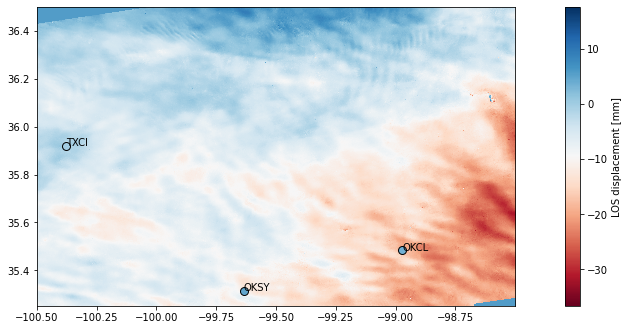

In [22]:
# plot GNSS stations on InSAR velocity field
vmin, vmax = np.amin(insar_displacement), np.amax(insar_displacement)
cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(figsize=[18, 5.5])
img1 = ax.imshow(insar_displacement, cmap=cmap, vmin=vmin, vmax=vmax, interpolation='nearest', extent=(W, E, S, N))
cbar1 = fig.colorbar(img1, ax=ax)
cbar1.set_label('LOS displacement [mm]')

for stn in displacement.index:
    lon,lat = displacement.loc[stn,'lon'],displacement.loc[stn,'lat']
    color = cmap((displacement.loc[stn,'gnss_disp']-vmin)/(vmax-vmin))
    ax.scatter(lon,lat,s=8**2,color=color,edgecolors='k')
    ax.annotate(stn,(lon,lat),color='black')

**NOTE:** Here the `P467` is selected as the reference as Secular Requirement Validation and the GNSS and InSAR relative observation are compared with respect to that reference station.
However, it is better to compare in pair-wise manner.

# 4.2 NISAR Validation: GNSS-InSAR Direct Comparison

In [23]:
if enoughGNSS:
    ddiff_disp = []
    ddiff_dist = []
    insar_disp = []
    gnss_disp = []
    for sta1 in displacement.index:
        for sta2 in displacement.index:
            sta1 = str(sta1)
            sta2 = str(sta2)
            if sta2 == sta1:
                break
            insar_disp.append(displacement.loc[sta1,'insar_disp']-displacement.loc[sta2,'insar_disp'])
            gnss_disp.append(displacement.loc[sta1,'gnss_disp']-displacement.loc[sta2,'gnss_disp'])
            ddiff_disp.append(gnss_disp[-1]-insar_disp[-1])
            g = pyproj.Geod(ellps="WGS84")
            _,_,distance = g.inv(displacement.loc[sta1,'lon'],displacement.loc[sta1,'lat'],
                             displacement.loc[sta2,'lon'],displacement.loc[sta2,'lat'])
            distance = distance/1000 # convert unit from m to km
            ddiff_dist.append(distance)

    assert len(ddiff_disp) == special.comb(len(displacement),2,exact=True)

### 4.2.A Compare Displacement

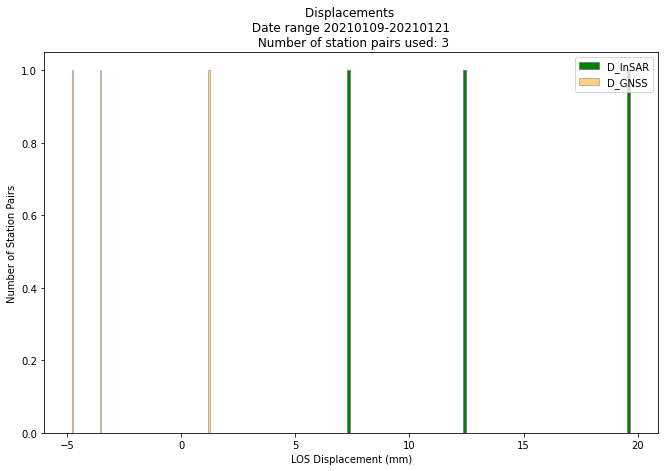

In [24]:
if enoughGNSS:
    plt.figure(figsize=(11,7))
    plt.hist(insar_disp,bins = 100, color = "green",edgecolor='grey',label='D_InSAR')
    plt.hist(gnss_disp,bins = 100, color = "orange",edgecolor='grey',label='D_GNSS', alpha=0.5)
    plt.legend(loc='upper right')
    plt.title(f"Displacements \n Date range {start_date}-{end_date} \n Number of station pairs used: {len(insar_disp)}")
    plt.xlabel('LOS Displacement (mm)')
    plt.ylabel('Number of Station Pairs')
    plt.show()

### 4.2.B Plot Displacement Residuals Distribution

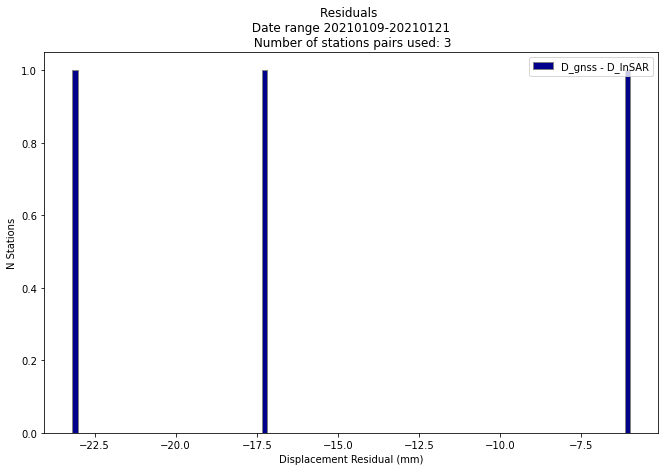

In [25]:
if enoughGNSS:
    plt.figure(figsize=(11,7))
    plt.hist(ddiff_disp,bins = 100,edgecolor='grey',color="darkblue",linewidth=1,label='D_gnss - D_InSAR')
    plt.legend(loc='upper right')
    plt.title(f"Residuals \n Date range {start_date}-{end_date} \n Number of stations pairs used: {len(ddiff_disp)}")
    plt.xlabel('Displacement Residual (mm)')
    plt.ylabel('N Stations')
    plt.show()

### 4.3.C. Plot Absolute Displacement Residuals As a Function of Distance

In [26]:
if enoughGNSS:
    dist_th = np.linspace(min(ddiff_dist),max(ddiff_dist),100)
    acpt_error = 3*(1+np.sqrt(dist_th))
    abs_ddiff_disp = [abs(i) for i in ddiff_disp]

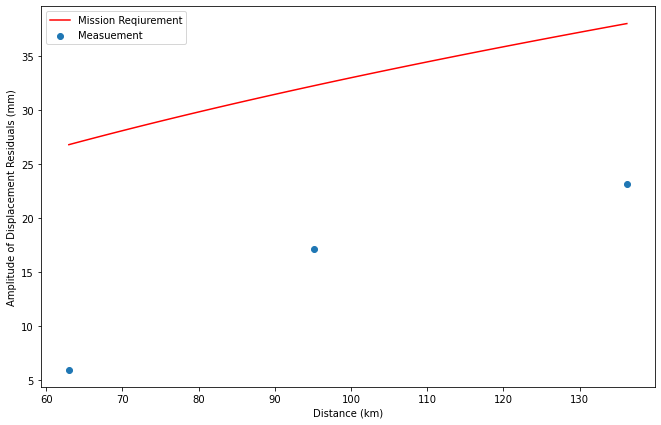

In [27]:
if enoughGNSS:
    plt.figure(figsize=(11,7))
    plt.scatter(ddiff_dist,abs_ddiff_disp)
    plt.plot(dist_th, acpt_error, 'r')
    plt.xlabel("Distance (km)")
    plt.ylabel("Amplitude of Displacement Residuals (mm)")
    plt.legend(["Mission Reqiurement","Measuement"])
    plt.show()

# 4.3 NISAR Validation: Noise Level Validation

**Note:** Now we simply assume there is no deformation in this study area and time interval. But in fact, it is hard to find a enough large area without any deformation. An more realistic solution is to apply a mask to mask out deformed regions. But this may introduce bias for emperical variation estimation.

In [28]:
def bin_variogram(distance: np.ndarray,
                  variogram: np.ndarray,
                  bins: int = 20,
                  distance_range: list = None) -> tuple:
    """Bin the distances and variogram for analysis

    Parameters
    ----------
    distance : np.ndarray
        Pairwise distances
    variogram : np.ndarray
        Variogram values associated with pairwise distances
    bins : int, optional
        Number of bins, by default 20
    distance_range : list, optional
        The range of distance to analyze (if None, whole range used), by default
        None.

    Returns
    -------
    tuple [np.ndarray, np.ndarray]
        (binned distances, binned variogram)
    """

    distance_range = distance_range or [0, np.nanmax(distance)]

    distance_binned, _, _ = binned_statistic(distance, distance,
                                             bins=bins, range=distance_range)
    variogram_binned, _, _ = binned_statistic(distance, variogram,
                                              bins=bins, range=distance_range)
    std_binned, _, _ = binned_statistic(distance, np.sqrt(variogram), statistic='std',
                                        bins=bins, range=distance_range)

    return distance_binned, variogram_binned, std_binned

**NOTE:** This is one function from `variogram.py` and
we change the input from variogram to square root of it when calcuting the std_binned.

In [29]:
# define several functions

def compute_empircal_variance(data: np.ndarray,X,Y, half_frame=50.0) -> tuple:
    """
    This function calculate the empirical variance and remove the pairs larger than half frame of the interferogram
    
    Parameters:
    data: np.ndarray
        input data array
    X: np.ndarray
        input X locations of the data points
    Y: np.ndarray
        input Y locations of the data points
   
    Returns:
    tuple [np.ndarray, np.ndarray]
        (dist,vario)
    """
    
    dist, vario = variogram.get_emp_variogram(X,Y,data
                                )

    #Approximate half frame length and remove pairs larger than half frame
#    ind1=np.argmin(X)
#    ind2=np.argmin(Y)
#    frame_X=X[ind2]-np.min(X)
#    frame_Y=np.max(Y)-Y[ind1]
#    half_frame=np.minimum(frame_X/2,frame_Y/2)
    ind=dist<half_frame
    dist=dist[ind]
    vario=vario[ind]
    print('Pair larger than ',half_frame,'km removed!')
    print('Number of pairs reduced to: ',dist.size)
    
    return dist, vario

def load_geo(attr_geo) -> np.array:
    """This program calculate the coordinate of the geocoded files 
    and perform coordinate transformation from longitude and latitude to local coordinate in kilometers.
    
    Parameters:
    ######
    geo_attr:attribute of the geocoded data

    Returns:
    ######
    X:coordinates in east direction in km
    Y:coordinates in north direction in km
    """
    
    X0=float(attr_geo['X_FIRST'])
    Y0=float(attr_geo['Y_FIRST'])
    X_step=float(attr_geo['X_STEP'])
    Y_step=float(attr_geo['Y_STEP'])
    length=int(attr_geo['LENGTH'])
    width=int(attr_geo['WIDTH'])
    
    # 
    Y_local_end_ix = math.floor(length/2)
    Y_local_first_ix = -(length-Y_local_end_ix-1)
    X_local_end_ix = math.floor(width/2)
    X_local_first_ix = -(width-X_local_end_ix-1)
    
    Y_origin = Y0+Y_step*(-Y_local_first_ix)
    
    X_step_local = math.cos(math.radians(Y_origin))*X_step*111.1
    Y_step_local = Y_step*111.1
    

    X=np.linspace(X_local_first_ix*X_step_local,X_local_end_ix*X_step_local,width)
    Y=np.linspace(Y_local_first_ix*Y_step_local,Y_local_end_ix*Y_step_local,length)
    X2d, Y2d = np.meshgrid(X,Y)

    return X2d, Y2d

def mask_nan(data: np.ndarray, cc: np.ndarray, X: np.ndarray, Y: np.ndarray) -> tuple:
    """
    This function mask out the nan values in the 2-D data image
    
    Parameters:
    data: np.ndarray
        input 2-D data image
    cc: np.ndarray
        input 2-D mask image
    X: np.ndarray
        X location of each data point
    Y: np.ndarray
        Y location of each data point
    
    Returns:
    tuple [np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]
        (data, cc, data_plot, cc_plot, X, Y)
    """
    
    ind=data==0
    data_plot=data
    data_plot[ind]=np.nan
    cc_plot=cc
    cc_plot[ind]=np.nan
    data=data[~ind]
    cc=cc[~ind]
    X=X[~ind]
    Y=Y[~ind]
    
    return data, cc, data_plot, cc_plot, X, Y

def mask_cc(data: np.ndarray, cc: np.ndarray, data_plot: np.ndarray, cc_plot: np.ndarray, X: np.ndarray, Y: np.ndarray, cc_threshold: float = 0.6) -> tuple:
    """
    This function mask the data using the coherence map
    
    Parameters:
    data: np.ndarray
        input 2-D data image
    cc: np.ndarray
        input 2-D mask image
    data_plot: np.ndarray
        input 2-D data image
    cc_plot: np.ndarray
        input 2-D mask image
    X: np.ndarray
        X location of each data point
    Y: np.ndarray
        Y location of each data point
    cc_threshold: float
        Coherence threshold for data masking
        
    Returns:
    tuple [np.ndarray, np.ndarray, np.ndarray, np.ndarray]
        (data, data_plot, X, Y)
    """
    
    mask=(cc<cc_threshold)
    data=data[~mask]
    X=X[~mask]
    Y=Y[~mask]
    mask=np.isnan(data)
    data=data[~mask]
    X=X[~mask]
    Y=Y[~mask]
    mask=(cc_plot<cc_threshold)
    CC_plot=mask
    data_plot[mask]=np.nan
    
    return data, data_plot, X, Y

def rand_samp(data: np.ndarray, X: np.ndarray, Y: np.ndarray, num_samples: int=10000, percent_samples: float=0.01) -> tuple:
    """
    This function select points used for calculation of structure function using a random point sampling 
    
    Parameters:
    data: np.ndarray
        input data array
    X: np.ndarray
        input X location of the data points
    Y: np.ndarray
        input Y location of the data points
    num_samples: int
        number of points to be sampled
    percent_samples: float
        percentage of points to be samples
        
    Returns: 
    tuple [np.ndarray, np.ndarray, np.ndarray]
        (data, X, Y)
    """
    length=np.size(data)
    if length<num_samples:
        n_points=length
        print('Using all data points: ', n_points)
    else:
        tmp=length*percent_samples
        if tmp<num_samples:
            n_points=num_samples
        else:
            
            n_points=int(np.ceil(tmp))
        print('Number of samples: ', n_points)
    
    if n_points>20000:
        n_points=20000
        warnings.warn('Warning: number of samples exceeds 20000, reduce to 20000 points!')
        
    ind=np.random.choice(length,n_points,replace=False)
    data=data[ind]
    X=X[ind]
    Y=Y[ind]

    n=np.size(data)
    print('Total pairs: ', n*(n-1)//2)
    
    return data, X, Y

### 4.3.A Mask Pixels with Low Coherence

In [30]:
X,Y = load_geo(atr)

In [31]:
data,cc,data_plot,cc_plot,X,Y = mask_nan(
    insar_displacement,insar_coherence,X,Y,)

In [32]:
data,data_plot,X,Y = mask_cc(data,cc,data_plot,cc_plot,X,Y,cc_threshold=0.6)

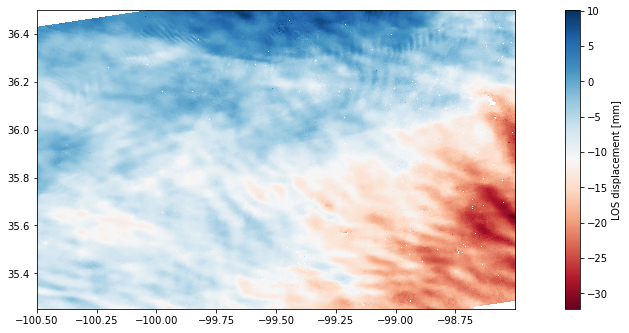

In [33]:
# Plot masked interferogram
cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(figsize=[18, 5.5])
img1 = ax.imshow(data_plot, cmap=cmap, interpolation='nearest', extent=(W, E, S, N))
cbar1 = fig.colorbar(img1, ax=ax)
cbar1.set_label('LOS displacement [mm]')

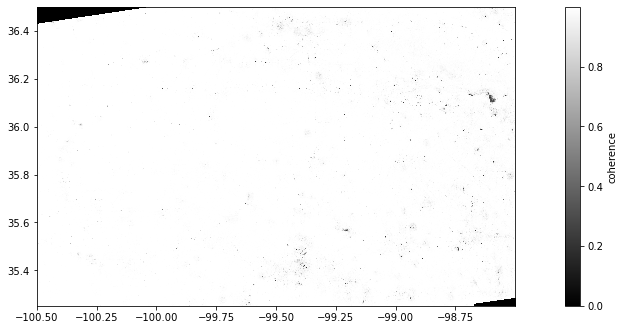

In [34]:
cmap = plt.get_cmap('gray')

fig, ax = plt.subplots(figsize=[18, 5.5])
img1 = ax.imshow(cc_plot,cmap=cmap, interpolation='nearest',extent=(W, E, S, N))
cbar1 = fig.colorbar(img1, ax=ax)
cbar1.set_label('coherence')

### 4.3.B Remove Trend

In [35]:
data_tmp=variogram.remove_trend(X,Y,data)
data=data_tmp

### 4.3.C Randomly Sample Pixel Pairs

In [36]:
data,X,Y=rand_samp(data,X,Y,num_samples=10000,percent_samples=0.003)

Number of samples:  10703
Total pairs:  57271753


### 4.3.D Compute Emprical Variance

In [37]:
dist,vario = compute_empircal_variance(data,X,Y)

Pair larger than  50.0 km removed!
Number of pairs reduced to:  13554803


Text(0, 0.5, 'Frequency')

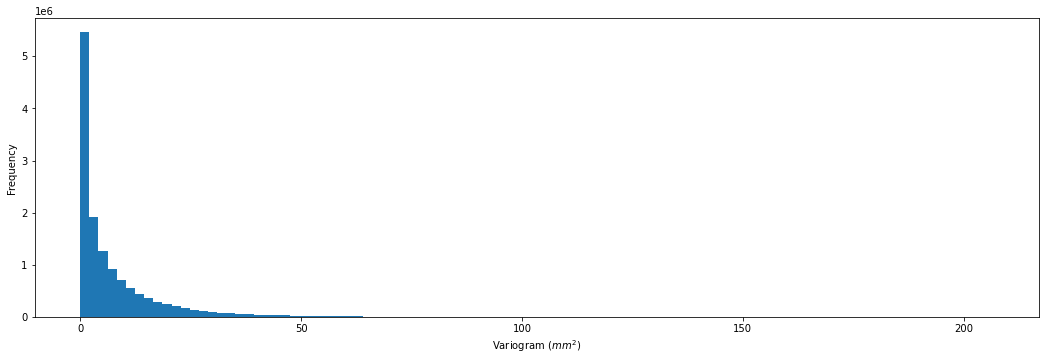

In [38]:
fig, ax = plt.subplots(figsize=[18, 5.5])

img1 = ax.hist(vario, bins=100)
ax.set_xlabel(r'Variogram ($mm^2$)')
ax.set_ylabel('Frequency')

Text(0.5, 0, 'Distance (km)')

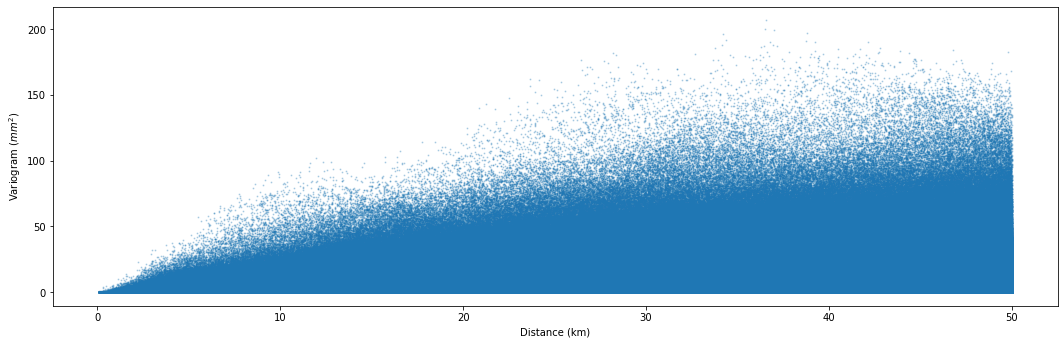

In [39]:
fig, ax = plt.subplots(figsize=[18, 5.5])
ax.scatter(dist, vario, s=1, alpha=0.25)
ax.set_ylabel(r'Variogram ($mm^2$)')
ax.set_xlabel('Distance (km)')

### 4.3.E Make Binned Variogram

In [40]:
dist_binned, variogram_binned, std_binned = bin_variogram(dist, vario,
                                                         distance_range=[0, 50],
                                                         bins=100
                                                         )

### 4.3.F Compare Variation with Requirement

Text(0.5, 1.0, 'Site Oklahoma winter')

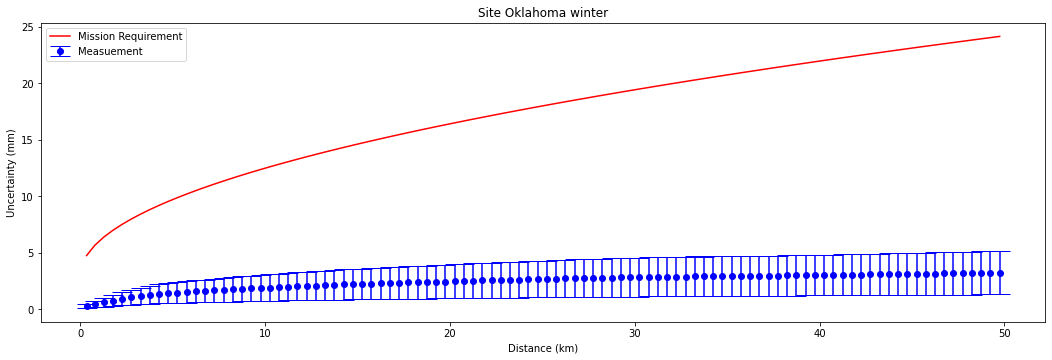

In [41]:
fig, ax = plt.subplots(figsize=[18, 5.5])
ax.plot(dist_binned, 3*(1+np.sqrt(dist_binned)), 'r')

ax.errorbar(dist_binned, np.sqrt(variogram_binned),yerr=std_binned,fmt='bo',capsize=10)

ax.set_xlabel('Distance (km)')
ax.set_ylabel('Uncertainty (mm)')

plt.legend(["Mission Requirement","Measuement"])
plt.title('Site '+calval_location+' '+season)

**Note:** Here we use the square root of binned emperical variogram as the emperical uncertaity.

# Appendix: GPS Position Plots

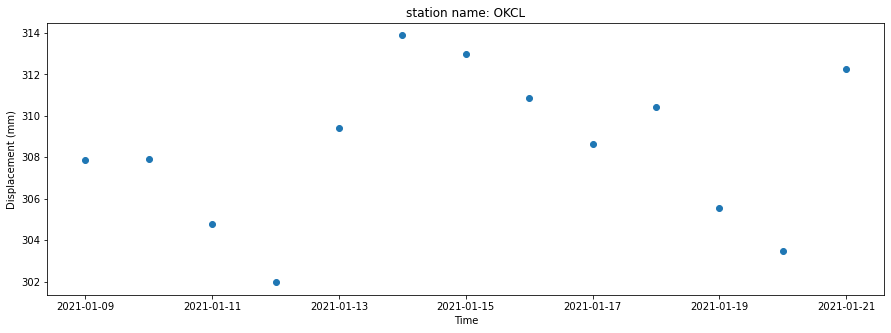

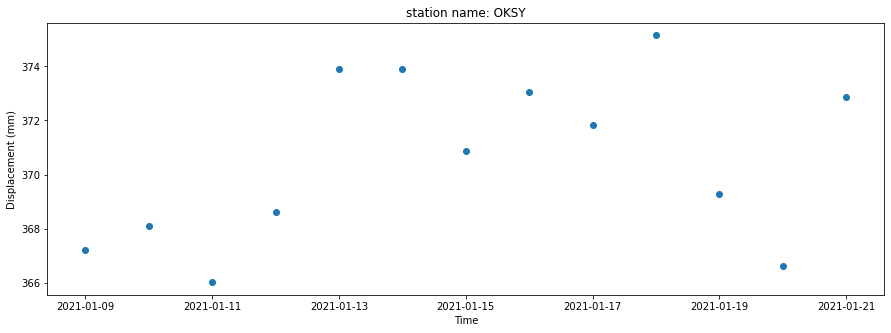

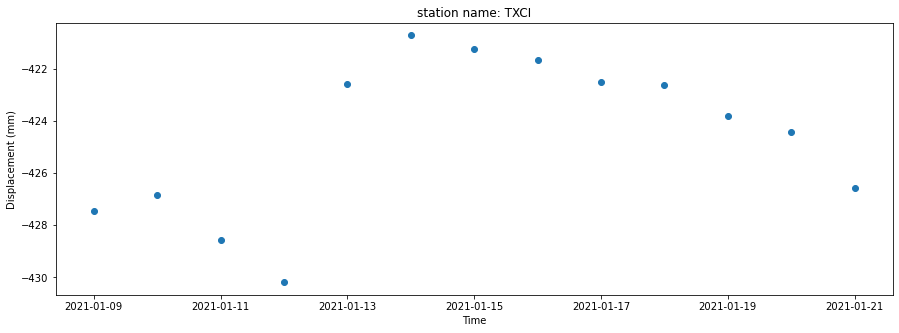

In [42]:
for stn in gnss_time_series.columns:
    series = gnss_time_series.loc['disp',str(stn)]
    plt.figure(figsize=(15,5))
    plt.title(f"station name: {stn}")
    plt.scatter(series.index,series)
    plt.xlabel('Time')
    plt.ylabel('Displacement (mm)')
    plt.show()